배운 평가지표와 측정을 예시 데이터를 가지고 사용하고 알아보자<br>
피마 인디언 당뇨병 데이터 세트를 이용해 당뇨병 여부를 판단하는 머신러닝 예측모델을 수립하고, 평가 지표를 적용
- Kaggle

- Pregnancies : 임신 횟수
- Glucose : 포도당 부하 검사 2시간 후 공복 혈당 농로 (mm Hg)
- BloodPressure : 확장기 혈압
- SkinThickness : 삼두근 피부 주름 두께
- Insulin : 혈청 인슐린
- BMI : 체질량 지수
- DiabetesPedigreeFunction : 당뇨병 가족력
- Age : 나이
- Outcome : 당뇨(1), 아님(0)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('../data/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head()

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


: 다행히 다 not null!

** 오차 행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 **

In [5]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    
    # ROC-AUC
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    
    # print
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

** 임곗값의 변경에 따른 정밀도-재현율 변화 곡선을 그림 **

In [6]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행
    #정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

### Logistic Regression으로 학습 및 예측 수행

In [8]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8072


Precision Recall 곡선 그림

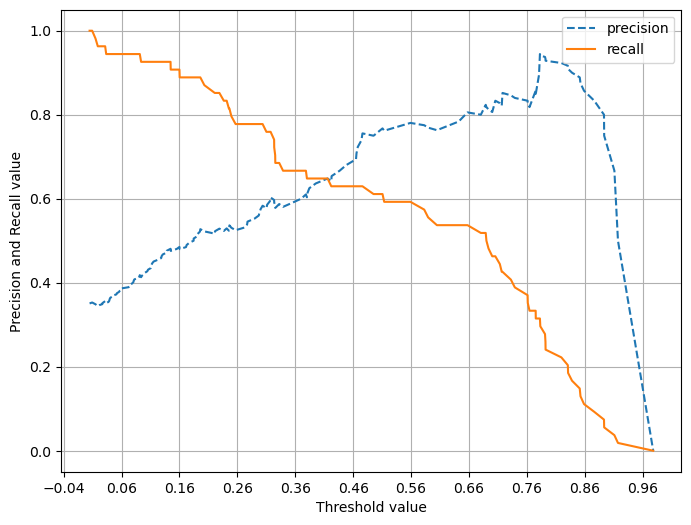

In [9]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)
# 아래 그림은 임계값이 0.42정도가 가장 좋다.

각 피쳐들의 값 4분위 분포 확인

In [10]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


min을 살펴봤을 때 임신횟수는 0일 수 있지만 다른 값들은 0이기 힘듦에도 불구하고 0값을 가진다

'Glucose'의 분포도

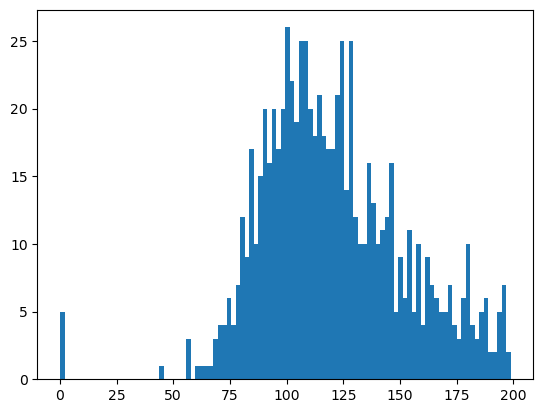

In [11]:
plt.hist(diabetes_data['Glucose'], bins = 100)
plt.show()

0 값이 있는 feature들에서 0값의 데이터 건수와 퍼센트 계산

In [13]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# feature별 ㅇ반복하면서 데이터 값이 0인 데이터 건수 추출하고 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0}의 0 건수는 {1}, 퍼센트는  {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose의 0 건수는 5, 퍼센트는  0.65 %
BloodPressure의 0 건수는 35, 퍼센트는  4.56 %
SkinThickness의 0 건수는 227, 퍼센트는  29.56 %
Insulin의 0 건수는 374, 퍼센트는  48.70 %
BMI의 0 건수는 11, 퍼센트는  1.43 %


0값을 평균값으로 대체

In [14]:
# zero_features리스트 내부에 저장된 개별 feature들에 대해서 0값을 평균값으로 대체
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

In [15]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


StandardScaler로 feature데이터 세트에 일괄적으로 스케일링 적용하고 0값으 평균값으로 대체하 데이터 세트로 학습/예측

In [16]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8454


정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8072 <데이터 전처리 전> <br>
<br>
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8454 <데이터 전처리 후>

##### 분류결정 임계값을 변경하면서 성능 측정
** 여러개의 분류 결정 임계값을 변경하면서 Binarizer를 이용하여 예측값 변환 **

In [17]:
from sklearn.preprocessing import Binarizer
x = [[1, -1, 2],
    [2, 0.5, 0],
    [0, 1.1, 1.2]]
#X의 개별 원소들이 threshold값보다 크거나 작으면 0, 크면 1을 반환
binarizer = Binarizer(threshold=.1)  # threshold : 임계값
print(binarizer.fit_transform(x))


[[1. 0. 1.]
 [1. 1. 0.]
 [0. 1. 1.]]


In [18]:
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [31]:
thresholds = [0.3, 0.33, 0.36, 0.39, .42, 0.45, 0.48, 0.50, 0.53, 0.55]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963,    F1: 0.6615, AUC:0.8454
임곗값: 0.33
오차 행렬
[[73 27]
 [12 42]]
정확도: 0.7468, 정밀도: 0.6087, 재현율: 0.7778,    F1: 0.6829, AUC:0.8454
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222,    F1: 0.6667, AUC:0.8454
임곗값: 0.39
오차 행렬
[[79 21]
 [16 38]]
정확도: 0.7597, 정밀도: 0.6441, 재현율: 0.7037,    F1: 0.6726, AUC:0.8454
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667,    F1: 0.6792, AUC:0.8454
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667,    F1: 0.6857, AUC:0.8454
임곗값: 0.48
오차 행렬
[[89 11]
 [19 35]]
정확도: 0.8052, 정밀도: 0.7609, 재현율: 0.6481,    F1: 0.7000, AUC:0.8454
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8454
임곗값: 0.53
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8454
임곗값: 0.55
오차 행렬
[[91  9]
 [23 31]]
정확도: 0.7922, 정밀도: 0.7750, 재현율: 0.5741,    F1: 0.6596, AUC:0.8454


In [30]:
# 임계값 0.48로 설정한 Binarizer생성
binarizer = Binarizer(threshold = 0.48)
# predic_proba() 예측 확률 1에 해댕하는 칼럼값을 binarizer로 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차 행렬
[[89 11]
 [19 35]]
정확도: 0.8052, 정밀도: 0.7609, 재현율: 0.6481,    F1: 0.7000, AUC:0.8454


** **

In [ ]:
random_state=42

fit_params = {"early_stopping_rounds" : 100, 
             "eval_metric" : 'auc', 
             "eval_set" : [(X,y)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#number of combinations
n_iter = 300

#intialize lgbm and lunch the search
lgbm_clf = lgbm.LGBMClassifier(random_state=random_state, silent=True, metric='None', n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=random_state,
    verbose=True)

grid_search.fit(X, y, **fit_params)
opt_parameters =  grid_search.best_params_
lgbm_clf = lgbm.LGBMClassifier(**opt_parameters)